In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("C:/Users/onkar/Downloads/4_may_prj/Logistic Regresssion_Project7/4. Logistic Regresssion/bank-full.csv", sep = ';')
print(data.head(5))

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [3]:
df = data.copy()
print(df.head(10))

   age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may     

In [4]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Data viz

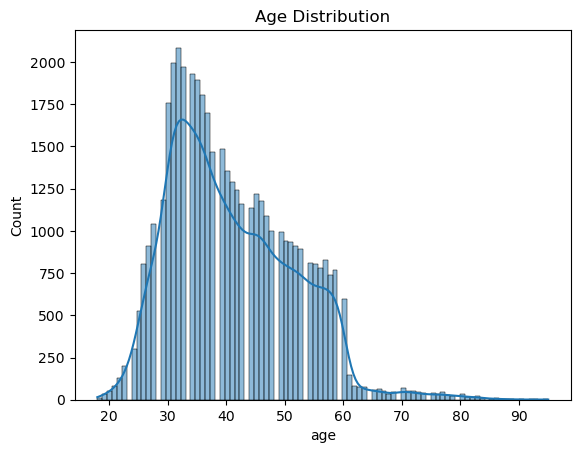

In [6]:
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.savefig('graphs/age_distibutionPRJ7.png')
plt.show()

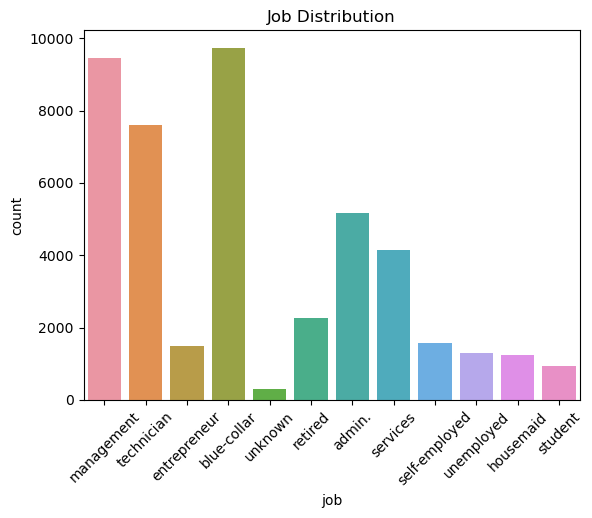

In [7]:
sns.countplot(x='job', data=df)
plt.xticks(rotation=45)
plt.title('Job Distribution')
plt.savefig('graphs/jpb_distributionPRJ7.png')
plt.show()

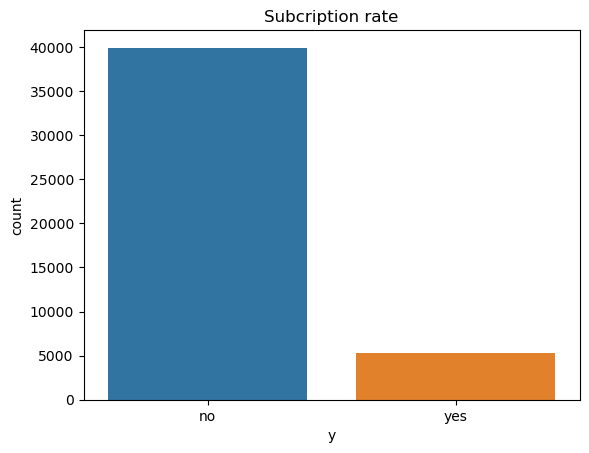

In [8]:
sns.countplot(x='y',data=df)
plt.title('Subcription rate')
plt.savefig('graphs/subcription_ratePRJ7.png')
plt.show()

In [9]:
df_emcoded = pd.get_dummies(df, drop_first=True)
print(df_emcoded.head())

   age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   58     2143    5       261         1     -1         0            False   
1   44       29    5       151         1     -1         0            False   
2   33        2    5        76         1     -1         0            False   
3   47     1506    5        92         1     -1         0             True   
4   33        1    5       198         1     -1         0            False   

   job_entrepreneur  job_housemaid  ...  month_jun  month_mar  month_may  \
0             False          False  ...      False      False       True   
1             False          False  ...      False      False       True   
2              True          False  ...      False      False       True   
3             False          False  ...      False      False       True   
4             False          False  ...      False      False       True   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0 

In [10]:
scaler = StandardScaler()
numerical_feature = ['age','balance','duration','campaign','pdays','previous']
df_emcoded[numerical_feature] = scaler.fit_transform(df_emcoded[numerical_feature])

In [11]:
from sklearn.model_selection import train_test_split

In [34]:
X = df_emcoded.drop('y_yes', axis= 1)
y = df_emcoded['y_yes']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression()

In [37]:
model.fit(X_train,y_train)

C:\Users\onkar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
from sklearn.metrics import confusion_matrix,classification_report

In [39]:
pred = model.predict(X_test)
print("Model pridiction is complete")

Model pridiction is complete


In [40]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[5818  152]
 [ 522  290]]
              precision    recall  f1-score   support

       False       0.92      0.97      0.95      5970
        True       0.66      0.36      0.46       812

    accuracy                           0.90      6782
   macro avg       0.79      0.67      0.70      6782
weighted avg       0.89      0.90      0.89      6782

